Problem Statement
Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

 

Data dictionary
The dataset can be download using this link. The data dictionary is provided for download below.

Data Dictionary - Telecom Churn
Download
The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

 

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

 

Data Preparation
The following data preparation steps are crucial for this problem:

 

1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.

import all libraries

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,PrecisionRecallDisplay,roc_auc_score,roc_curve

from xgboost import XGBClassifier,XGBRFClassifier


import optuna

import warnings
warnings.filterwarnings('ignore')

# from imblearn.combine import SMOTETomek
# from skopt import BayesSearchCV
# import lightgbm as lgb

load attributes description

In [3]:
data_dictionary = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dictionary.to_dict("records")

[{'Acronyms    ': 'MOBILE_NUMBER', 'Descriptions': 'Customer phone number'},
 {'Acronyms    ': 'CIRCLE_ID',
  'Descriptions': 'Telecom circle area to which the customer belongs to'},
 {'Acronyms    ': 'LOC',
  'Descriptions': 'Local calls - within same telecom circle'},
 {'Acronyms    ': 'STD',
  'Descriptions': 'STD calls - outside the calling circle'},
 {'Acronyms    ': 'IC', 'Descriptions': 'Incoming calls'},
 {'Acronyms    ': 'OG', 'Descriptions': 'Outgoing calls'},
 {'Acronyms    ': 'T2T',
  'Descriptions': 'Operator T to T, i.e. within same operator (mobile to mobile)'},
 {'Acronyms    ': 'T2M    ',
  'Descriptions': 'Operator T to other operator mobile'},
 {'Acronyms    ': 'T2O    ',
  'Descriptions': 'Operator T to other operator fixed line'},
 {'Acronyms    ': 'T2F    ', 'Descriptions': 'Operator T to fixed lines of T'},
 {'Acronyms    ': 'T2C    ',
  'Descriptions': 'Operator T to it’s own call center'},
 {'Acronyms    ': 'ARPU    ', 'Descriptions': 'Average revenue per user'

load churn data

In [4]:
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
pd.set_option('display.max_columns', None)
data.info()
# Information about dataset
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_

In [7]:
data.shape

(99999, 226)

Checking on column wise null counts

In [8]:
null_counts = data.isnull().sum()
null_counts

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

Dropping all columns with more than 50% missing values

In [9]:
drop_columns = list(null_counts[null_counts > 50000].reset_index()['index'].to_numpy())
drop_columns

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [10]:
for col in drop_columns:
    data.drop(col, axis=1, inplace=True)

In [11]:
data.shape    

(99999, 186)

attributes irrelevant or non-representative of the customer's churn behaviour

In [12]:
# columns with a single unique value - thus zero variance

unique_1_col=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

data.drop(unique_1_col, axis=1, inplace = True)
print("dropped_columns:",unique_1_col)

dropped_columns: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [13]:
data.shape

(99999, 170)

In [14]:
pd.set_option('display.max_columns', None)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,

In [15]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

% of rows with null values (null percentage)

In [16]:
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

og_others_9           7.75
roam_ic_mou_9         7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
loc_ic_mou_9          7.75
                      ... 
max_rech_amt_8        0.00
max_rech_amt_9        0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
sep_vbc_3g            0.00
Length: 170, dtype: float64

In [17]:
data.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.00

datetime conversion

In [18]:
# selecting all the columns with datetime format
date_col= data.select_dtypes(include=['object'])
print("date cols represented as object - ",date_col.columns)

date cols represented as object -  Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')


In [19]:
# Converting the selected columns to datetime format
for i in date_col.columns:
    data[i] = pd.to_datetime(data[i])

data.shape

(99999, 170)

In [20]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 170 columns):
 #    Column               Dtype         
---   ------               -----         
 0    mobile_number        int64         
 1    arpu_6               float64       
 2    arpu_7               float64       
 3    arpu_8               float64       
 4    arpu_9               float64       
 5    onnet_mou_6          float64       
 6    onnet_mou_7          float64       
 7    onnet_mou_8          float64       
 8    onnet_mou_9          float64       
 9    offnet_mou_6         float64       
 10   offnet_mou_7         float64       
 11   offnet_mou_8         float64       
 12   offnet_mou_9         float64       
 13   roam_ic_mou_6        float64       
 14   roam_ic_mou_7        float64       
 15   roam_ic_mou_8        float64       
 16   roam_ic_mou_9        float64       
 17   roam_og_mou_6        float64       
 18   roam_og_mou_7        float64       
 19   ro

Handling missing values

In [21]:
rech_columns = [col for col in data.columns if 'rech' in col]
rech_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [22]:
# Handling missing values with respect to recharge attributes
data[['date_of_last_rech_6', 'total_rech_num_6', 'max_rech_amt_6']].head(10)

,date_of_last_rech_6,total_rech_num_6,max_rech_amt_6
0,2014-06-21,4,252
1,2014-06-29,4,44
2,2014-06-17,5,86
3,2014-06-28,10,60
4,2014-06-26,5,56
5,2014-06-19,2,120
6,2014-06-28,15,90
7,2014-06-27,5,1580
8,2014-06-25,19,90
9,2014-06-29,4,110


In [23]:
# If both 'total_rech_num' and 'max_rech_amt' for a specific month are null, it then checks if 'date_of_last_rech_data' for the same month is also null.

# If 'date_of_last_rech_data' for that month is also null, it imputes 'total_rech_num' and 'max_rech_amt' for that month with 0.

# if there's no record of the last recharge date and both the total recharge number and maximum recharge amount are missing, the code assumes that there were no recharges for that month and sets these values to 0.

# However, there's a potential issue with the condition `pd.isnull((data['total_rech_num_6'][i]) and (data['max_rech_amt_6'][i]))`. This condition will only be true if both 'total_rech_num_6' and 'max_rech_amt_6' are null due to the behavior of the `and` operator. If you want to check if either of them is null, you should use the `or` operator instead.

for i in range(len(data)):
  # Handling 'total_rech_num', 'max_rech_amt' and for month 6
    if pd.isnull((data['total_rech_num_6'][i]) and (data['max_rech_amt_6'][i])):
        if pd.isnull(data['date_of_last_rech_data_6'][i]):
            data['total_rech_num_6'][i]=0
            data['max_rech_amt_6'][i]=0

  # Handling 'total_rech_num', 'max_rech_amt' and for month 7
    if pd.isnull((data['total_rech_num_7'][i]) and (data['max_rech_amt_7'][i])):
        if pd.isnull(data['date_of_last_rech_data_7'][i]):
            data['total_rech_num_7'][i]=0
            data['max_rech_amt_7'][i]=0

  # Handling 'total_rech_num', 'max_rech_amt' and for month 8
    if pd.isnull((data['total_rech_num_8'][i]) and (data['max_rech_amt_8'][i])):
        if pd.isnull(data['date_of_last_rech_data_8'][i]):
            data['total_rech_num_8'][i]=0
            data['max_rech_amt_8'][i]=0

  # Handling 'total_rech_num', 'max_rech_amt' and for month 9
    if pd.isnull((data['total_rech_num_9'][i]) and (data['max_rech_amt_9'][i])):
        if pd.isnull(data['date_of_last_rech_data_9'][i]):
            data['total_rech_num_9'][i]=0
            data['max_rech_amt_9'][i]=0



In [24]:
data.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [25]:
# Checking the related columns values
data[['monthly_2g_6','monthly_3g_6','total_rech_num_6']].head(10)

,monthly_2g_6,monthly_3g_6,total_rech_num_6
0,0,1,4
1,0,0,4
2,0,0,5
3,0,0,10
4,0,0,5
5,0,0,2
6,0,0,15
7,0,0,5
8,0,0,19
9,0,0,4


In [26]:
pd.DataFrame((data.isnull().sum()/len(data)*100).sort_values(ascending=False))

,0
og_others_9,7.745077
roam_ic_mou_9,7.745077
loc_og_t2c_mou_9,7.745077
loc_og_mou_9,7.745077
loc_ic_mou_9,7.745077
...,...
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
last_day_rch_amt_6,0.000000
last_day_rch_amt_7,0.000000


In [27]:
# Removing column with 30% or more null values as it will reduce the impact on analysis
data = data.loc[:,data.isnull().sum()/data.shape[0]*100<30]

data.shape

(99999, 170)

In [28]:
# Removing rows with missing values with more than 10 missing values
data.dropna(axis=0,inplace=True,thresh=data.shape[1]-10)
# Shape of the dataframe after removing rows
print(data.shape)

(88327, 170)


In [29]:
# List of columns with Date datatype
date_cols = [k for k in data.columns.to_list() if 'date' in k]
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [30]:
# Converting Date columns to datetime datatype and extracting the days before last day
for i in date_cols:
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].dt.date
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].dt.daysinmonth - data[i].dt.day

data[date_cols].value_counts()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  date_of_last_rech_9
0.0                  0.0                  0.0                  0.0                    772
                                                               1.0                    438
                                          1.0                  0.0                    383
                     1.0                  0.0                  0.0                    371
1.0                  0.0                  0.0                  0.0                    343
                                                                                     ... 
5.0                  18.0                 1.0                  4.0                      1
                                                               1.0                      1
                     17.0                 26.0                 21.0                     1
                                          13.0                 10.0                     1
29.0             

In [31]:
data.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [32]:
# Removing the columns with only one unique value among date columns, as abserved in the above cell
data.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],inplace=True)

date_cols.remove('date_of_last_rech_6')
date_cols.remove('date_of_last_rech_7')
date_cols.remove('date_of_last_rech_8')

In [33]:
# CIRCLE_ID
data.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [34]:
pd.DataFrame((data.isnull().sum()/len(data)*100).sort_values(ascending=False))

,0
date_of_last_rech_9,2.005049
mobile_number,0.000000
isd_ic_mou_8,0.000000
total_ic_mou_8,0.000000
total_ic_mou_9,0.000000
...,...
isd_og_mou_6,0.000000
isd_og_mou_7,0.000000
isd_og_mou_8,0.000000
isd_og_mou_9,0.000000


Visualizing correlations of input feaatures with the target variable

In [36]:
data.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

visualize data completeness using missingness plot - which depicts how complete/or filled each column is in the dataset

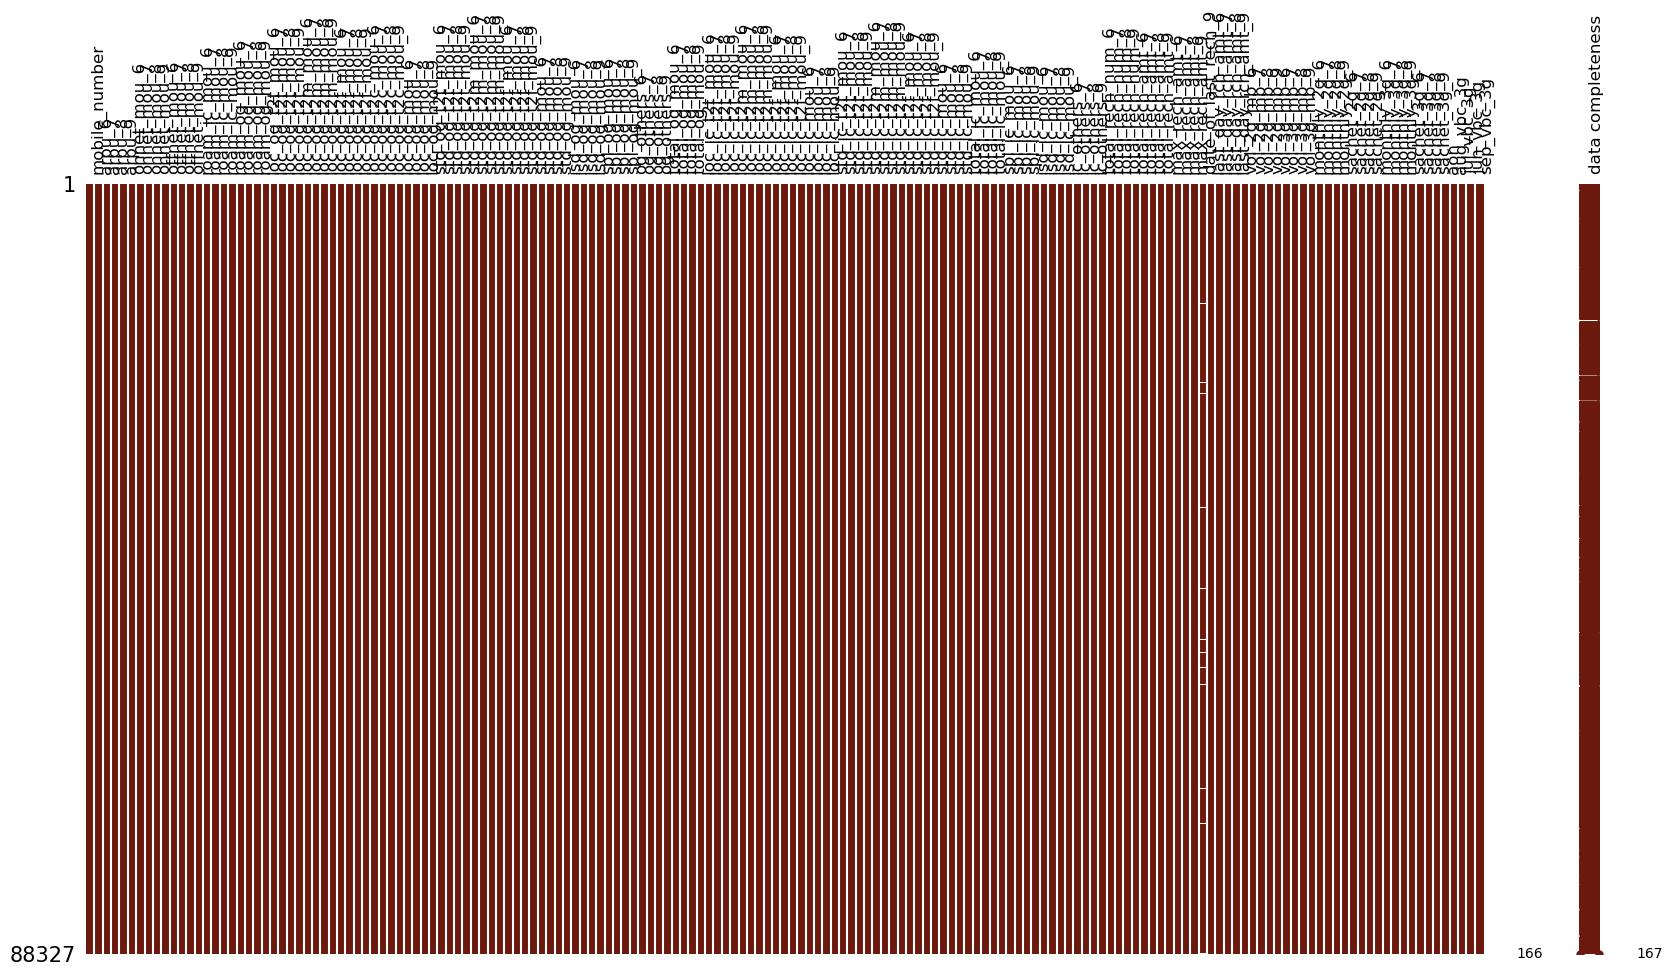

In [44]:
import missingno as msno
msno.matrix(data,figsize=(20,10),fontsize=12,color=(0.42, 0.1, 0.05),sparkline=True,labels=True,label_rotation=90)
plt.show()

clearly all the current columns are mostly complete, with only a few to zero missing values.

In [49]:
# Checking the overall missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_9    2.01
mobile_number          0.00
isd_ic_mou_8           0.00
total_ic_mou_8         0.00
total_ic_mou_9         0.00
                       ... 
isd_og_mou_6           0.00
isd_og_mou_7           0.00
isd_og_mou_8           0.00
isd_og_mou_9           0.00
sep_vbc_3g             0.00
Length: 167, dtype: float64

The remaining attributes with missing value can be imputed using the advanced imputation technique like `KNNImputer`.

In [50]:
# Numerical columns available
num_col = data.select_dtypes(include = ['int64','float64']).columns.tolist()

# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
data[num_col]=scalar.fit_transform(data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)



telecom_data_knn = pd.DataFrame(knn.fit_transform(data[num_col]))
telecom_data_knn.columns=data[num_col].columns



# Converting the scaled data back to the original data
data[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7.001866e+09,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.0,9.0,11.0,5.0,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,44.0,23.0,30.0,0.0,0.0,108.07,365.47,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.0,0.00,0.00,0.00,0.0
2,7.001626e+09,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85

In [52]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

In [54]:
data.isnull().sum().sum()


0

Thus now there are no missing valuesm in the dataset

#### Defining Churn variable

<class 'pandas.core.frame.DataFrame'>
Index: 88327 entries, 1 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  88327 non-null  float64
 1   total_og_mou_9  88327 non-null  float64
 2   vol_2g_mb_9     88327 non-null  float64
 3   vol_3g_mb_9     88327 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB
churn
0    97.092622
1     2.907378
Name: count, dtype: float64


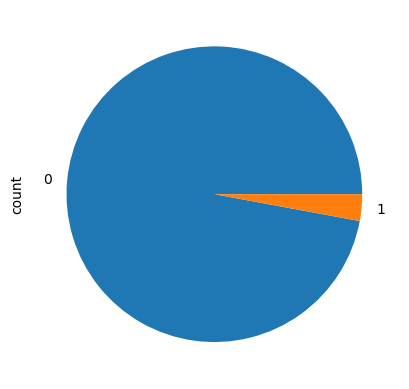

In [66]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
data[churn_col].info()

# Initializing the churn variable.
data['churn']=0

# Imputing the churn values based on the condition
data['churn'] = np.where(data[churn_col].sum(axis=1) == 0, 1, 0)

# lets find out churn/non churn percentage
print((data['churn'].value_counts()/len(data))*100)
((data['churn'].value_counts()/len(data))*100).plot(kind="pie")

plt.show()

#### Deriving new features

In [67]:
# Average recharge amount for June and July
data['avg_rech_amt_6_7']=((data['total_rech_amt_6']+data['total_rech_amt_7'])/2)

In [58]:
# Days user with company
data['days_stayed'] = data['last_day_rch_amt_8'] - data['last_day_rch_amt_6']


In [59]:
# Average 3g usage for June and July
data['avg_3g_6_7']=((data['vol_3g_mb_6']+data['vol_3g_mb_7'])/2)


In [60]:
# Average 2g usage for June and July
data['avg_2g_6_7']=((data['vol_2g_mb_6']+data['vol_2g_mb_7'])/2)


In [61]:
# Avergae of 6th and 7th month total usage
data['avg_total_6_7']=((data['total_og_mou_6']+data['total_og_mou_7'])/2)


In [62]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2


In [63]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)


#### Filtering High-Value Customers

In [68]:
# Filtering the customers based on average recharge amount
perc_6_7=data['avg_rech_amt_6_7'].quantile(0.70)
tel_churn=data[data['avg_rech_amt_6_7']>=perc_6_7]
tel_churn.shape

(26511, 177)

~97% of the customers do not churn, there is a high possibility of class imbalance,
Since this variable churn is the target variable, all the columns relating to this variable can be dropped forn the dataset.


In [70]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [71]:
# Dropping the selected churn phase columns
data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
data.shape

(88327, 136)

- clean the data by few possible columns relating to the good phase.

- using derived few columns in the good phase earlier, we can drop those related columns during creation.

In [72]:
data.drop(['total_rech_amt_6','av_rech_amt_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

KeyError: "['total_rech_amt_data_6', 'av_rech_amt_data_6', 'total_rech_data_6', 'total_rech_amt_data_7', 'av_rech_amt_data_7', 'total_rech_data_7'] not found in axis"

In [73]:
# creating a list of column names for each month
mon_6_cols = [col for col in data.columns if '_6' in col]
mon_7_cols = [col for col in data.columns if '_7' in col]
mon_8_cols = [col for col in data.columns if '_8' in col]

# lets check the correlation amongst the independent variables, drop the highly correlated ones
data_corr = data.corr()
data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.955367
isd_og_mou_8      isd_og_mou_7        0.953655
total_rech_amt_6  arpu_6              0.952337
isd_og_mou_7      isd_og_mou_6        0.951979
total_rech_amt_7  arpu_7              0.951665
avg_arpu_action   arpu_8              0.950981
                  arpu_7              0.948181
isd_og_mou_8      isd_og_mou_6        0.946868
avg_total_6_7     total_og_mou_7      0.939379
avg_rech_amt_6_7  total_rech_amt_7    0.935041
avg_total_6_7     total_og_mou_6      0.932874
avg_rech_amt_6_7  arpu_7              0.931026
                  total_rech_amt_6    0.930473
avg_3g_6_7        vol_3g_mb_7         0.926093
avg_arpu_action   total_rech_amt_7    0.921627
avg_rech_amt_6_7  arpu_6              0.920621
avg_arpu_action   total_rech_amt_8    0.920000
avg_3g_6_7        vol_3g_mb_6         0.917932
avg_arpu_action   avg_rech_amt_6_7    0.912124
avg_2g_6_7        vol_2g_mb_6         0.906773
                  vol_2g_mb_7         0.906569
total_ic_mou_

check the collineartity of the indepedent variablesm

In [75]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.955367
isd_og_mou_8      isd_og_mou_7        0.953655
total_rech_amt_6  arpu_6              0.952337
isd_og_mou_7      isd_og_mou_6        0.951979
total_rech_amt_7  arpu_7              0.951665
avg_arpu_action   arpu_8              0.950981
                  arpu_7              0.948181
isd_og_mou_8      isd_og_mou_6        0.946868
avg_total_6_7     total_og_mou_7      0.939379
avg_rech_amt_6_7  total_rech_amt_7    0.935041
avg_total_6_7     total_og_mou_6      0.932874
avg_rech_amt_6_7  arpu_7              0.931026
                  total_rech_amt_6    0.930473
avg_3g_6_7        vol_3g_mb_7         0.926093
avg_arpu_action   total_rech_amt_7    0.921627
avg_rech_amt_6_7  arpu_6              0.920621
avg_arpu_action   total_rech_amt_8    0.920000
avg_3g_6_7        vol_3g_mb_6         0.917932
avg_arpu_action   avg_rech_amt_6_7    0.912124
avg_2g_6_7        vol_2g_mb_6         0.906773
                  vol_2g_mb_7         0.906569
total_ic_mou_

In [76]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
data.drop(col_to_drop, axis=1, inplace=True)

In [77]:
data.shape

(88327, 124)

#### Adding new variables

In [78]:
# creating a new variable 'tenure'
data['tenure'] = (data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
data.drop('aon',axis=1, inplace=True)

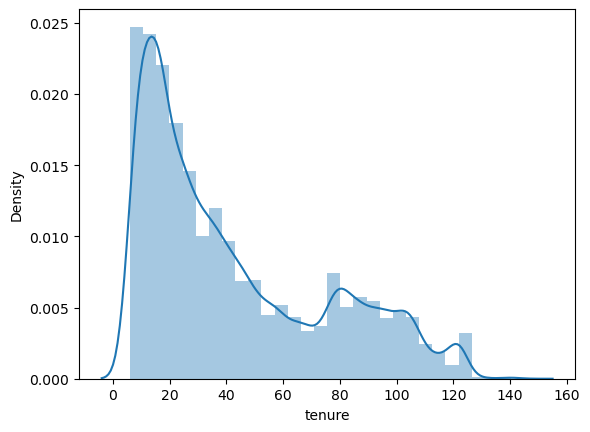

In [80]:
# Checking the distribution of he tenure variable

sns.distplot(data['tenure'],bins=30)
plt.show()

In [81]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data['tenure_range'] = pd.cut(data['tenure'], tn_range, labels=tn_label)
data['tenure_range'].head()

1    2-5 Yrs
2    2-5 Yrs
3        NaN
4    2-5 Yrs
5    2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

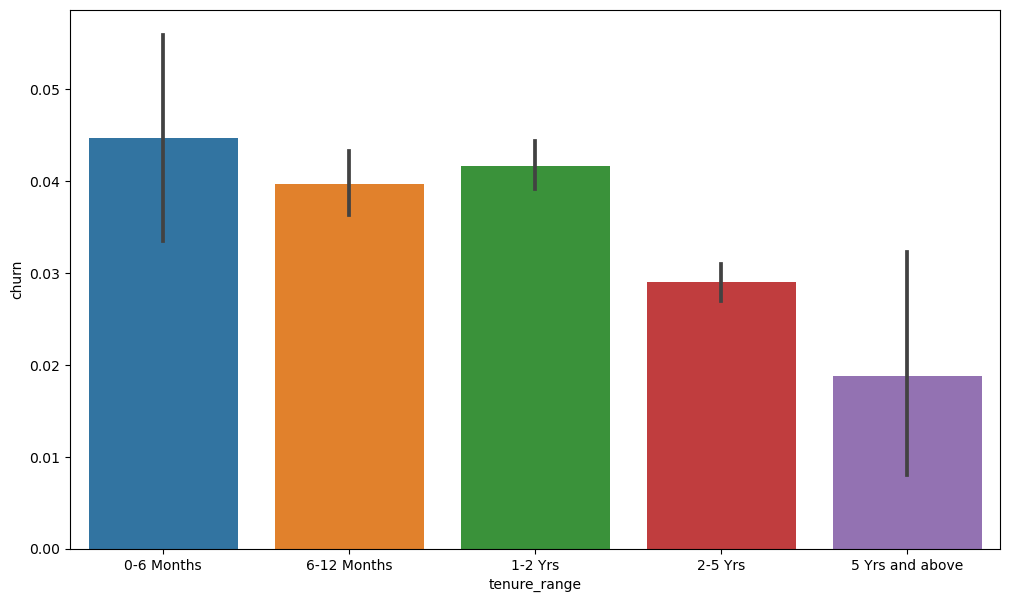

In [82]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=data)
plt.show()

Maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

Average revenue per user is good phase of customer - given by arpu_6 and arpu_7. 

As we have two seperate averages, lets take an average to these two and drop the other columns.

In [83]:
data["avg_arpu_6_7"]= (data['arpu_6']+data['arpu_7'])/2
data['avg_arpu_6_7'].head()

1    194.5605
2    178.3740
3    236.2200
4    285.7560
5     54.5340
Name: avg_arpu_6_7, dtype: float64

In [84]:
data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
data.shape

(88327, 124)

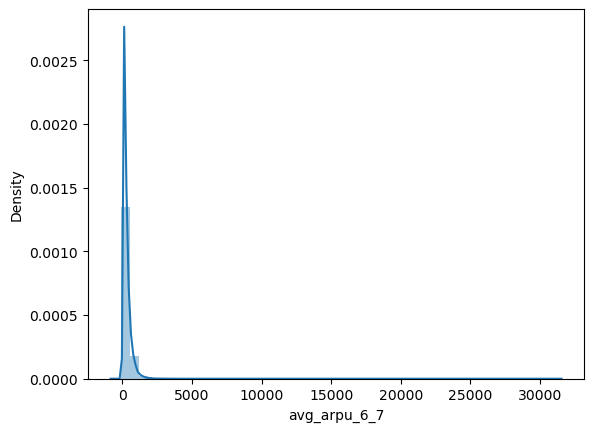

In [85]:
# Visualizing the column created
sns.distplot(data['avg_arpu_6_7'])
plt.show()

In [ ]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

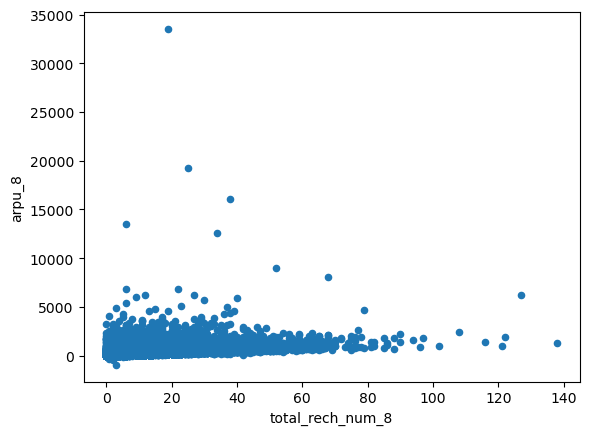

In [87]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

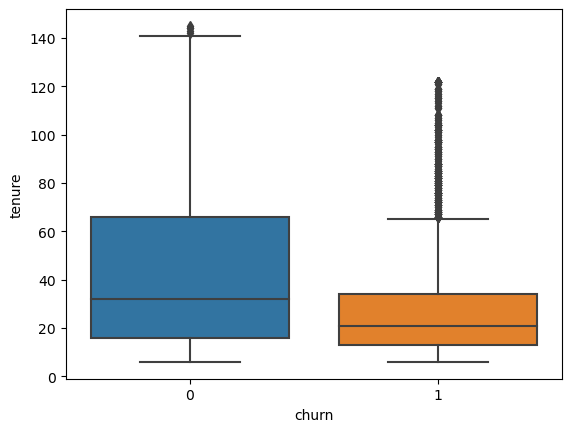

In [88]:
sns.boxplot(x = data.churn, y = data.tenure)

plt.show()

It can be observed that tenured customers do no churn and they keep availing telecom servicesm

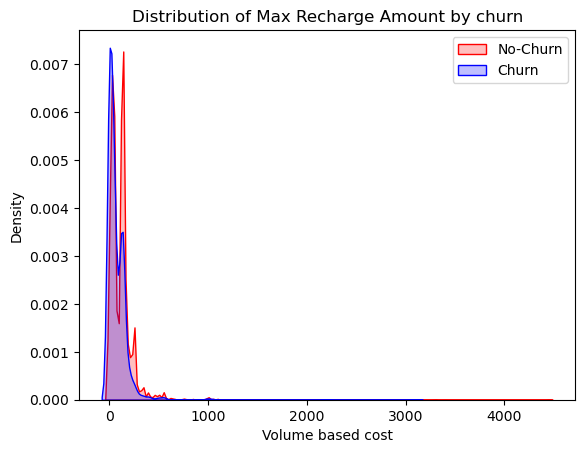

In [90]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [92]:
data.columns.to_list()

['mobile_number',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_

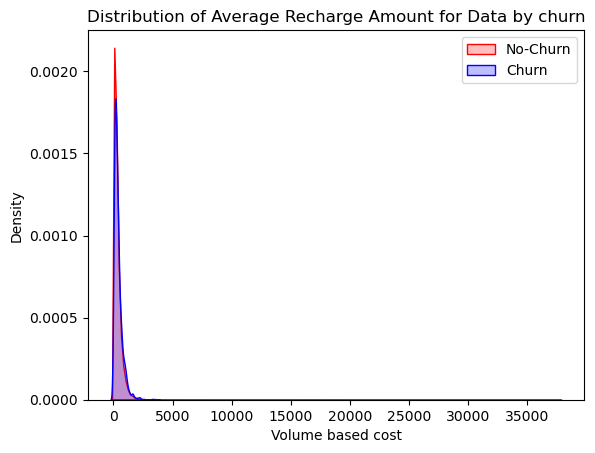

In [93]:
# churn vs max rechare amount
ax = sns.kdeplot(data.avg_rech_amt_6_7[(data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data.avg_rech_amt_6_7[(data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

KeyError: 'total_rech_data_group_8'

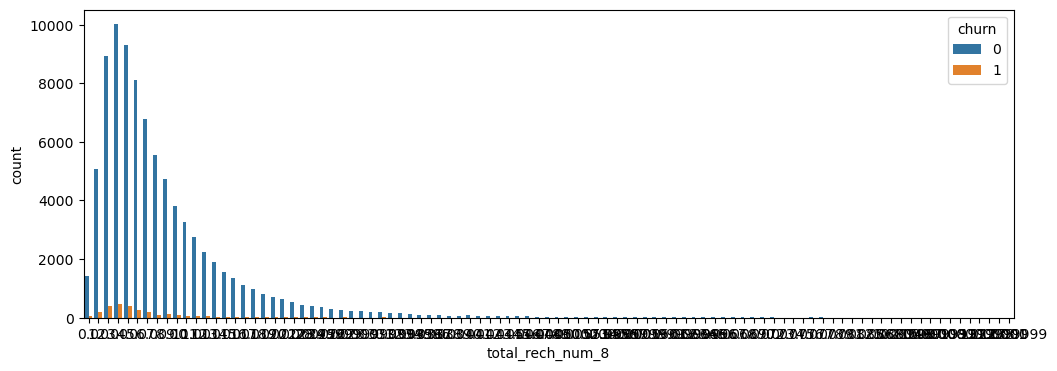

In [95]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_num_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_num_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",data['total_rech_num_group_8'].value_counts())
plt.show()

In [96]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['total_rech_num_8','total_rech_amt_6','tenure_range']], drop_first=True)
dummy.head()

KeyError: "['total_rech_data_group_8', 'total_rech_num_group_8'] not in index"

In [ ]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

# Creating a copy of the filtered dataframe

df=telecom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

# Cheking the dataset
df.head()

# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [ ]:
X.head()

In [ ]:
# lets create y dataset for model building.
y=df['churn']
y.head()

#### Modelling

In [ ]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

In [ ]:
X_train.info(verbose=True)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

In [ ]:
Logistic Regression

# Importing necessary libraries for Model creation
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

# using RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)


rfe.support_

In [ ]:
##### Assessing the model with StatsModels

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

## Model Selection using RandomizedSearchCV

#### Correlation Matrix

In [46]:
data.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [47]:
print("Correlation matrix for all columns\n\n", data.corr())

Correlation matrix for all columns

                mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  \
mobile_number       1.000000  0.012079  0.005196  0.005907  0.010341   
arpu_6              0.012079  1.000000  0.784232  0.704356  0.663338   
arpu_7              0.005196  0.784232  1.000000  0.803444  0.737054   
arpu_8              0.005907  0.704356  0.803444  1.000000  0.816418   
arpu_9              0.010341  0.663338  0.737054  0.816418  1.000000   
...                      ...       ...       ...       ...       ...   
aon                 0.319389  0.014556  0.003696  0.011208  0.018335   
aug_vbc_3g         -0.023589  0.186816  0.200088  0.231751  0.201042   
jul_vbc_3g         -0.022199  0.199153  0.225655  0.188547  0.181025   
jun_vbc_3g         -0.024756  0.225849  0.184154  0.175714  0.172877   
sep_vbc_3g         -0.008518  0.090796  0.099402  0.128024  0.167605   

               onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
mobile_number    -0.002063   

In [ ]:
data.print("Correlation matrix for all columns\n\n", telecom_data.corr())

In [35]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
'arpu_6',
 'arpu_6',
 'arpu_6',
 'arpu_6',
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", data[['arpu_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", data[['arpu_6','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_6','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", telecom_data[['arpu_6','arpu_2g_9','av_rech_amt_data_9']].corr())

KeyError: "None of [Index(['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6'], dtype='object')] are in the [columns]"

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = data.copy()

X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Select top n principal components
explained_variance = pca.explained_variance_ratio_

KeyError: "['target'] not found in axis"

In [ ]:
explained_variance

In [ ]:
mobile_number, ARPU, 